In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D

In [3]:
# test_sample = tf.random.uniform([3, 3])

# print("Is GPU available :")
# print(tf.test.is_gpu_available())
# print("Check if the Tensor is on GPU #0 :")
# print(test_sample.device.endswith('GPU:0'))
# print("Device Name :")
# print(test_sample.device)

In [5]:
DATA_DIR_PATH = "../data/bengali_AI_handwritten_grapheme_classification"

IMG_HEIGHT = 137
IMG_WIDTH = 236

ROOT_CLASSES_NUM = 168
CONSONANT_CLASSES_NUM = 7
VOWEL_CLASSES_NUM = 11

In [6]:
train_df = pd.read_csv("{}/train.csv".format(DATA_DIR_PATH))
test_df = pd.read_csv("{}/test.csv".format(DATA_DIR_PATH))
class_map_df = pd.read_csv("{}/class_map.csv".format(DATA_DIR_PATH))
sample_submission_df = pd.read_csv("{}/sample_submission.csv".format(DATA_DIR_PATH))

In [7]:
sample_submission_df

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0
5,Test_1_vowel_diacritic,0
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,0
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0


In [8]:
class_map_df

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


In [9]:
train_df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [10]:
test_df

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root
5,Test_1_vowel_diacritic,Test_1,vowel_diacritic
6,Test_2_consonant_diacritic,Test_2,consonant_diacritic
7,Test_2_grapheme_root,Test_2,grapheme_root
8,Test_2_vowel_diacritic,Test_2,vowel_diacritic
9,Test_3_consonant_diacritic,Test_3,consonant_diacritic


In [14]:
def read_parquet_data(dir_path: str, num_file: int, data_type: str) -> list:
    df_list = list()
    data_type = data_type.lower()
    
    for i in range(num_file):
        df = pd.read_parquet("{}/{}_image_data_{}.parquet".format(dir_path, data_type, i))
        df.set_index('image_id', inplace=True)
        df_list.append(df)
        
        print("Reading {} th parquet file is done".format(i))
    
    return df_list

In [15]:
train_df_list = read_parquet_data(dir_path=DATA_DIR_PATH, num_file=4, data_type="train")

Reading 0 th parquet file is done
Reading 1 th parquet file is done
Reading 2 th parquet file is done
Reading 3 th parquet file is done


In [16]:
test_df_list = read_parquet_data(dir_path=DATA_DIR_PATH, num_file=4, data_type="test")

Reading 0 th parquet file is done
Reading 1 th parquet file is done
Reading 2 th parquet file is done
Reading 3 th parquet file is done


In [20]:
[len(train_df) for train_df in train_df_list]

[50210, 50210, 50210, 50210]

In [21]:
[len(test_df) for test_df in test_df_list]

[3, 3, 3, 3]

In [22]:
def reshape_img(img_data):
    if isinstance(img_data, pd.Series):
        img_data = img_data.to_numpy()
    
    return img_data.reshape(IMG_HEIGHT, IMG_WIDTH)

In [23]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()

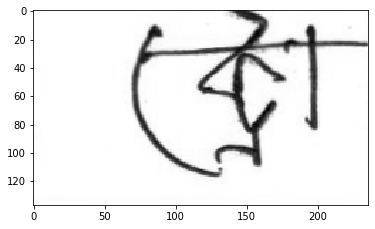

In [24]:
show_img(reshape_img(train_df_list[0].iloc[0]))

In [25]:
img_name_list = list(train_df_list[0].index)

In [26]:
img_name_list

['Train_0',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Train_56',
 'Train_57',
 'Train_58',
 'Train_59',
 'Train_60',
 'Train_61',
 'Train_62',
 'Train_63',
 'Train_64',
 'Train_65',
 'Train_66',
 'Train_67',
 'Train_68',
 'Train_69',
 'Train_70',
 'Train_71',
 'Train_72',
 'Train_73',
 'Train_74',
 'Train_75',
 'Train_76',
 'Train_7

In [27]:
def get_class_dict(class_map_df: pd.DataFrame) -> dict:
    class_dict = dict()

    for component_type in set(class_map_df['component_type']):
        output_df = class_map_df[class_map_df['component_type'] == component_type]
        output_df.drop('component_type', axis=1, inplace=True)
        output_df.index = output_df['label']

        class_dict[component_type] = output_df

    return class_dict

In [28]:
class_dict = get_class_dict(class_map_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
class_dict.keys()

dict_keys(['vowel_diacritic', 'consonant_diacritic', 'grapheme_root'])

In [30]:
print(len(class_dict['consonant_diacritic']))
class_dict['consonant_diacritic']

7


,label,component
label,,
0,0,0
1,1,ঁ
2,2,র্
3,3,র্য
4,4,্য
5,5,্র
6,6,্র্য


In [31]:
print(len(class_dict['grapheme_root']))
class_dict['grapheme_root']

168


,label,component
label,,
0,0,ং
1,1,ঃ
2,2,অ
3,3,আ
4,4,ই
...,...,...
163,163,হ্ল
164,164,ৎ
165,165,ড়


In [32]:
print(len(class_dict['vowel_diacritic']))
class_dict['vowel_diacritic']

11


,label,component
label,,
0,0,0
1,1,া
2,2,ি
3,3,ী
4,4,ু
5,5,ূ
6,6,ৃ
7,7,ে
8,8,ৈ


In [33]:
# class BengaliModel(tf.keras.Model):
    
#     def __init__(self, name='BengaliModel'):
#         super(BengaliModel, self).__init__(name=name)
        
#         self.conv_1 = Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1))
#         self.bn_1 = BatchNormalization(momentum=0.15)
#         self.mp_1 = MaxPool2D(pool_size=(2, 2))
#         self.drop_1 = Dropout(rate=0.3)
        
#         self.conv_2 = Conv2D(64, 3, padding='same', activation='relu')
#         self.bn_2 = BatchNormalization(momentum=0.15)
#         self.mp_2 = MaxPool2D(pool_size=(2, 2))
#         self.drop_2 = Dropout(rate=0.3)
        
#         self.flatten_1 = Flatten()
        
#         self.fc_1 = Dense(256, activation='relu')
#         self.drop_3 = Dropout(rate=0.3)
#         self.fc_2 = Dense(128, activation='relu')
#         self.drop_4 = Dropout(rate=0.3)
        
#         self.out_root = Dense(168, activation='softmax')
#         self.out_consonent = Dense(7, activation='softmax')
#         self.out_vowel = Dense(11, activation='softmax')
    
#     def call(self, input_img):
#         m = self.conv_1(input_img)
#         m = self.bn_1(m)
#         m = self.mp_1(m)
#         m = self.drop_1(m)
#         m = self.conv_2(m)
#         m = self.bn_2(m)
#         m = self.drop_2(m)
#         m = self.flatten_1(m)
#         m = self.fc_1(m)
#         m = self.drop_3(m)
#         m = self.fc_2(m)
#         m = self.drop_4(m)
        
#         root = self.out_root(m)
#         consonent = self.out_consonent(m)
#         vowel = self.out_vowel(m)
        
#         return root, consonent, vowel

In [34]:
del model

NameError: name 'model' is not defined

In [35]:
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1), name='img')

m = Conv2D(32, 3, padding='same', activation='relu')(inputs)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Conv2D(64, 3, padding='same', activation='relu')(m)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Flatten()(m)

m = Dense(256, activation='relu')(m)
m = Dropout(rate=0.3)(m)
m = Dense(128, activation='relu')(m)
m = Dropout(rate=0.3)(m)

root = Dense(ROOT_CLASSES_NUM, activation='softmax', name='root')(m)
consonent = Dense(CONSONANT_CLASSES_NUM, activation='softmax', name='consonent')(m)
vowel = Dense(VOWEL_CLASSES_NUM, activation='softmax', name='vowel')(m)

In [36]:
model = tf.keras.Model(inputs=inputs, outputs=[root, consonent, vowel])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 137, 236, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 137, 236, 32) 320         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 137, 236, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 68, 118, 32)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
t = reshape_img(train_df_list[0].iloc[0]).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
# t = tf.data.Dataset.from_tensor_slices(t)

In [40]:
train_df = pd.read_csv("{}/train.csv".format(DATA_DIR_PATH))
root_labels = tf.one_hot(indices=train_df['grapheme_root'], depth=ROOT_CLASSES_NUM)

In [41]:
consonant_labels = tf.one_hot(indices=train_df['consonant_diacritic'], depth=CONSONANT_CLASSES_NUM)

In [42]:
vowel_labels = tf.one_hot(indices=train_df['vowel_diacritic'], depth=VOWEL_CLASSES_NUM)

In [43]:
print([len(root_labels[0]), len(consonant_labels[0]), len(vowel_labels[0])])

[168, 7, 11]


In [44]:
model.fit(
    {'img': t},
    {'root': np.asarray([root_labels[0]]), 'consonent': np.asarray([consonant_labels[0]]), 'vowel': np.asarray([vowel_labels[0]])}
)

Train on 1 samples
1/1 [==============================] - 8s 8s/sample - loss: 25.0971 - root_loss: 10.4178 - consonent_loss: 7.2604 - vowel_loss: 7.4188 - root_accuracy: 0.0000e+00 - consonent_accuracy: 0.0000e+00 - vowel_accuracy: 0.0000e+00


In [45]:
t.shape

(1, 137, 236, 1)

In [46]:
tf.one_hot([1, 2, 5], depth=6)

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>